# Predicting Shelter Animal Outcomes

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

%matplotlib inline
import seaborn as sns

In [49]:
data = pd.read_csv("train.csv")
print(data.shape)
print(data.dtypes)

(26729, 11)
AnimalID                  object
Name                      object
DateTime          datetime64[ns]
OutcomeType               object
OutcomeSubtype            object
AnimalType                object
SexuponOutcome            object
Breed                     object
Color                     object
AgeinDays                  int64
AnimalTypeNum              int64
dtype: object


In [50]:
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,AgeinDays,AnimalTypeNum
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,365,1
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,365,0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,Pit Bull Mix,Blue/White,730,1
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,21,0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,730,1


## 1. Formatting the data

### a. Check values in each column

In [12]:
data.OutcomeType.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [13]:
data.Color.value_counts()

Black/White                  2824
Black                        2292
Brown Tabby                  1635
Brown Tabby/White             940
White                         931
Brown/White                   884
Orange Tabby                  841
Tan/White                     773
Tricolor                      752
Blue/White                    702
Black/Tan                     672
White/Black                   643
Brown                         639
Tan                           628
White/Brown                   569
Tortie                        530
Calico                        517
Orange Tabby/White            455
Blue                          450
Brown Brindle/White           450
Black/Brown                   436
Blue Tabby                    433
White/Tan                     389
Red                           337
Torbie                        335
Brown/Black                   333
Red/White                     331
Blue Tabby/White              241
Brown Brindle                 232
Chocolate/Whit

In [15]:
(data.Breed.value_counts()/data.shape[0]).cumsum()

Domestic Shorthair Mix                                 0.329605
Pit Bull Mix                                           0.400913
Chihuahua Shorthair Mix                                0.466983
Labrador Retriever Mix                                 0.517977
Domestic Medium Hair Mix                               0.549366
German Shepherd Mix                                    0.570878
Domestic Longhair Mix                                  0.590333
Siamese Mix                                            0.604886
Australian Cattle Dog Mix                              0.618616
Dachshund Mix                                          0.630514
Boxer Mix                                              0.639680
Miniature Poodle Mix                                   0.648397
Border Collie Mix                                      0.656964
Australian Shepherd Mix                                0.663063
Catahoula Mix                                          0.668936
Rat Terrier Mix                         

In [31]:
data.SexuponOutcome.value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [32]:
data.OutcomeSubtype.value_counts()

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

In [48]:
#format Datetime
data['DateTime'] = pd.to_datetime(data['DateTime']) 

In [5]:
typeData = data.groupby("AnimalType")

In [11]:
data.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [11]:
dataAge = data.AgeuponOutcome.tolist()

In [12]:
# create list of age in days
AgeinDays = []
for i in dataAge:
    if type(i) == str :
        num = (i.split()[0])
        letter = (i.split()[1][0])
        if(letter == 'y'):
            days = int(num)*365
        elif(letter == 'm'):
            days = int(num)*30
        elif(letter == 'w'):
            days = int(num)*7
        else:
            days = int(num)
        AgeinDays.append(days)
    else:
        AgeinDays.append(0)

In [13]:
# check list
AgeinDays

[365,
 365,
 730,
 21,
 730,
 30,
 21,
 21,
 150,
 365,
 730,
 730,
 1460,
 730,
 365,
 90,
 21,
 14,
 730,
 365,
 60,
 365,
 730,
 300,
 60,
 30,
 180,
 1825,
 60,
 2555,
 1095,
 120,
 60,
 1825,
 1095,
 1095,
 1095,
 60,
 120,
 21,
 2555,
 60,
 60,
 1460,
 730,
 4380,
 3285,
 21,
 150,
 2190,
 365,
 90,
 21,
 730,
 60,
 7,
 60,
 365,
 1460,
 730,
 365,
 4015,
 30,
 730,
 14,
 2190,
 180,
 60,
 60,
 365,
 60,
 730,
 1095,
 365,
 1460,
 730,
 90,
 365,
 60,
 730,
 365,
 14,
 28,
 730,
 4380,
 365,
 60,
 14,
 90,
 90,
 150,
 1095,
 2555,
 730,
 120,
 3285,
 210,
 60,
 1095,
 1095,
 1825,
 1825,
 14,
 14,
 1460,
 1460,
 60,
 730,
 730,
 3285,
 1825,
 365,
 730,
 21,
 150,
 2190,
 365,
 90,
 30,
 1095,
 1825,
 2920,
 60,
 2555,
 60,
 1825,
 365,
 90,
 730,
 3285,
 1095,
 1095,
 365,
 730,
 365,
 730,
 730,
 730,
 90,
 30,
 60,
 300,
 730,
 60,
 180,
 60,
 365,
 180,
 365,
 21,
 730,
 330,
 90,
 730,
 730,
 730,
 120,
 120,
 150,
 60,
 2555,
 1460,
 21,
 180,
 150,
 2920,
 60,
 30,
 150,
 

In [14]:
# append numerical age column to data set
data['AgeinDays'] = AgeinDays

In [15]:
del data['AgeuponOutcome']
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,AgeinDays
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,365
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,365
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,Pit Bull Mix,Blue/White,730
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,21
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,730


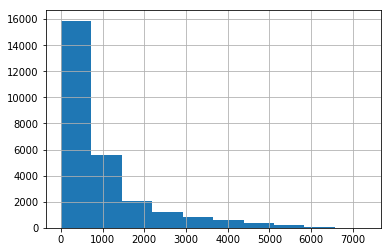

In [16]:
data.AgeinDays.hist()

In [17]:
data.AnimalType.value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

In [18]:
# convert animal type to binary value
# Dog = 1, Cat = 0
data["AnimalTypeNum"] = (data.AnimalType=='Dog').astype(int)

In [19]:
data.AnimalTypeNum.value_counts()

1    15595
0    11134
Name: AnimalTypeNum, dtype: int64

In [21]:
# expand outcomes into individual columns
OutcomeDF = data.OutcomeType.str.get_dummies()
OutcomeDF.head(20)

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,0,0,0,1,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
5,0,0,0,0,1
6,0,0,0,0,1
7,0,0,0,0,1
8,1,0,0,0,0
9,1,0,0,0,0


In [25]:
ExpandedData = pd.concat((data,OutcomeDF), axis=1)
del ExpandedData['OutcomeType']
ExpandedData.head() 

,AnimalID,Name,DateTime,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,AgeinDays,AnimalTypeNum,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,A671945,Hambone,2014-02-12 18:22:00,NaN,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,365,1,0,0,0,1,0
1,A656520,Emily,2013-10-13 12:44:00,Suffering,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,365,0,0,0,1,0,0
2,A686464,Pearce,2015-01-31 12:28:00,Foster,Dog,Neutered Male,Pit Bull Mix,Blue/White,730,1,1,0,0,0,0
3,A683430,NaN,2014-07-11 19:09:00,Partner,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,21,0,0,0,0,0,1
4,A667013,NaN,2013-11-15 12:52:00,Partner,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,730,1,0,0,0,0,1


In [26]:
ExpandedData.describe()

,AgeinDays,AnimalTypeNum,Adoption,Died,Euthanasia,Return_to_owner,Transfer
count,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000
mean,793.595982,0.583449,0.402896,0.007370,0.058177,0.179056,0.352501
std,1082.661580,0.492996,0.490489,0.085535,0.234081,0.383407,0.477758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1095.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,7300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# separate into dog and cat data
dogData = ExpandedData[ExpandedData.AnimalTypeNum == 1]
catData = ExpandedData[ExpandedData.AnimalTypeNum == 0]
dogData.shape # matches previous number of values

(15595, 15)

In [33]:
# create column to identify mixed breeds
mixMask = ['Mix' in breed for breed in ExpandedData.Breed.tolist()]
mixMask

In [36]:
ExpandedData['mixedBreed'] = mixMask

In [39]:
ExpandedData.mixedBreed = ExpandedData.mixedBreed.astype(int)

In [40]:
ExpandedData.head()

,AnimalID,Name,DateTime,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,AgeinDays,AnimalTypeNum,Adoption,Died,Euthanasia,Return_to_owner,Transfer,mixedBreed
0,A671945,Hambone,2014-02-12 18:22:00,NaN,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,365,1,0,0,0,1,0,1
1,A656520,Emily,2013-10-13 12:44:00,Suffering,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,365,0,0,0,1,0,0,1
2,A686464,Pearce,2015-01-31 12:28:00,Foster,Dog,Neutered Male,Pit Bull Mix,Blue/White,730,1,1,0,0,0,0,1
3,A683430,NaN,2014-07-11 19:09:00,Partner,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,21,0,0,0,0,0,1,1
4,A667013,NaN,2013-11-15 12:52:00,Partner,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,730,1,0,0,0,0,1,0


In [42]:
ExpandedData.Adoption.corr(ExpandedData.AgeinDays)

-0.14741598857649466

In [43]:
ExpandedData.corr()

,AgeinDays,AnimalTypeNum,Adoption,Died,Euthanasia,Return_to_owner,Transfer,mixedBreed
AgeinDays,1.000000,0.232715,-0.147416,-0.023708,0.149999,0.307658,-0.164804,-0.079831
AnimalTypeNum,0.232715,1.000000,0.033087,-0.057618,-0.020186,0.295644,-0.251020,-0.319317
Adoption,-0.147416,0.033087,1.000000,-0.070781,-0.204155,-0.383627,-0.606083,-0.039334
Died,-0.023708,-0.057618,-0.070781,1.000000,-0.021416,-0.040243,-0.063578,0.018417
Euthanasia,0.149999,-0.020186,-0.204155,-0.021416,1.000000,-0.116072,-0.183379,0.028702
Return_to_owner,0.307658,0.295644,-0.383627,-0.040243,-0.116072,1.000000,-0.344587,-0.074155
Transfer,-0.164804,-0.251020,-0.606083,-0.063578,-0.183379,-0.344587,1.000000,0.082533
mixedBreed,-0.079831,-0.319317,-0.039334,0.018417,0.028702,-0.074155,0.082533,1.000000


In [45]:
ExpandedData.isnull().sum()

AnimalID               0
Name                7691
DateTime               0
OutcomeSubtype     13612
AnimalType             0
SexuponOutcome         1
Breed                  0
Color                  0
AgeinDays              0
AnimalTypeNum          0
Adoption               0
Died                   0
Euthanasia             0
Return_to_owner        0
Transfer               0
mixedBreed             0
dtype: int64

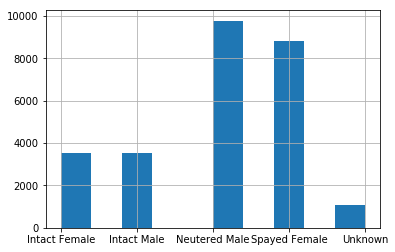

In [46]:
ExpandedData['SexuponOutcome'].hist()

In [73]:
ExpandedData['DateTime'] = pd.to_datetime(ExpandedData['DateTime'],format="%Y-%m-%d")
ExpandedData['Date'] = ExpandedData.DateTime.dt.date

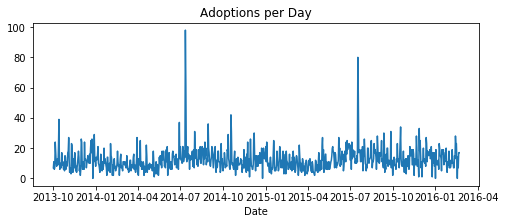

In [92]:
# Adoptions per Day
DayData = ExpandedData.groupby('Date')
DailyAdoptions = DayData['Adoption'].agg(np.sum)
DailyAdoptions.plot(title='Adoptions per Day', figsize =(8,3))


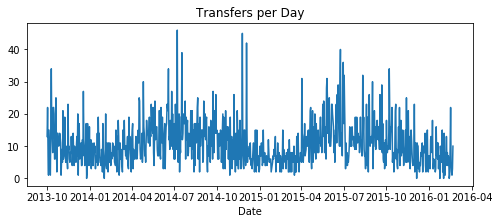

In [91]:
# Transfers per Day
DayData = ExpandedData.groupby('Date')
DailyTransfers = DayData['Transfer'].agg(np.sum)
DailyTransfers.plot(title='Transfers per Day', figsize =(8,3))

## Logistic Regression

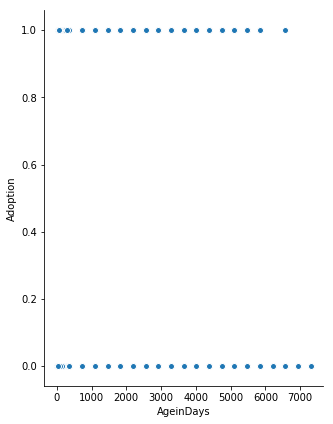

In [76]:
# plot Age and Adoption 
sns.pairplot(ExpandedData,x_vars=["AgeinDays"],
             y_vars="Adoption", size=6, aspect=0.8)

In [81]:
# Compute Logistic Regression to Predict Adoption
logreg = LogisticRegression()
feature_cols = ['AgeinDays', 'AnimalTypeNum']
X = ExpandedData[feature_cols]
y = ExpandedData.Adoption
logreg.fit(X,y)
AdoptionPredLog = logreg.predict(X)

In [82]:
AdoptionPredLog

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
list(zip(feature_cols, logreg.coef_[0]))

[('AgeinDays', -0.0003589411199976324), ('AnimalTypeNum', 0.3178070939987827)]

In [83]:
y = ExpandedData.Adoption
y_pred = AdoptionPredLog
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

Model accuracy: 0.5916420367391223
